<p style="text-align: center;font-size:2.3em;">Breast cancer diagnosis with a classifier</p>
<br>

Our database contains labeled data of patients with or without breast cancer.
A set of descriptive medical data is associated with the labeled patients.

We will try to find the best model to predict whether a patient has breast cancer or not.

The database can be found here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

<p style="font-family: Arial; font-size:2em;color:blue;"> I. Data preparation </p>

### Importing data

In [2]:
dataset = load_breast_cancer()

In [3]:
df = pd.DataFrame(data = np.c_[dataset.data, dataset.target],
                  columns = np.append(dataset.feature_names, 'target'))

### Initial data exploration

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

This database looks very clean. There are no missing values, there are no type conversions to perform, no one hot encoding to perform, no columns to eliminate ...

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


We can see that we will have to standardize our features.

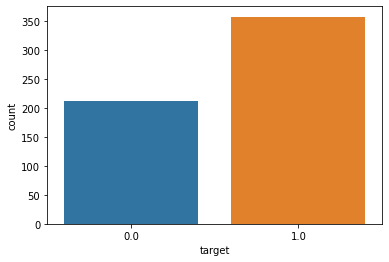

In [7]:
sns.countplot(df['target'])

There is a ~ 2/3 relationship between our two classes. It is not a significant imbalance but the F1 score will help.

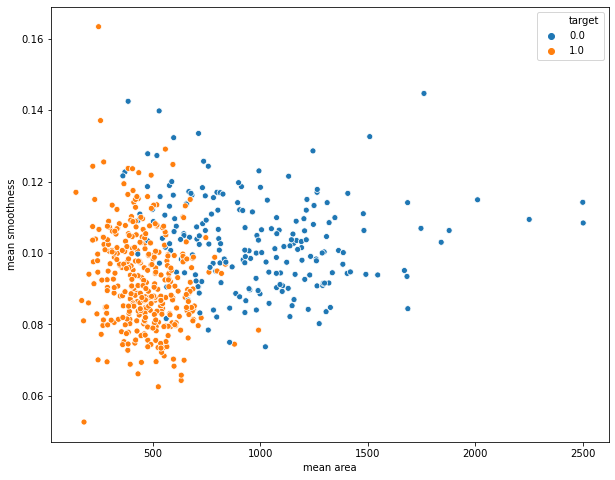

In [8]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df)

We can see by choosing two features randomly that these two classes seem rather distinct. <br>
We are potentially going to have good accuracies.

### Feature standardization

In [9]:
features = dataset.feature_names
scaler = StandardScaler()
scaled = scaler.fit_transform(df[features])
df[features] = pd.DataFrame(scaled)

In [10]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15,0.627417
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,0.483918
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00,0.000000
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01,0.000000
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01,1.000000
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01,1.000000
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00,1.000000


We will use cross_val_score to train our algorithms to counter overfitting. <br>
We will then choose the best model. <br>
We will finally separate our data into training and test sets in order to obtain our accuracy metric.

In [11]:
features = dataset['feature_names']
all_X = df[features]
all_y = df['target']

<hr style="border:2px solid gray"> </hr>

<p style="font-family: Arial; font-size:2em;color:blue;"> II. Models initial training </p>

### Metrics choice

We will use three metrics to study the precision of our models: recall, precison and F1. <br>
**Recall metric** is the risk of telling a patient that she does not have cancer when she does. <br>
**Precision metric** is the risk of telling a patient that she has cancer when she does not. <br>
We will focus on a balance between these two risks, the **F1 score**.

   ###  1. Models used

- Random Forest
- Gradient Boosting
- Support Vector Machine
- KNN
- XGBoost

In [12]:
# Evaluation of our models according to different metrics
def model_training(model,features):
    scoring = ['recall','precision','f1']
    scores = {}
    for score in scoring:
        value = np.mean(cross_val_score(model,all_X[features],all_y,scoring=score,cv=10))
        scores[score] = value
    
    return scores

In [13]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', random_state=1, activation='logistic',  hidden_layer_sizes=(15,))
model_training(clf,features)

{'recall': 0.9690476190476189,
 'precision': 0.9779987129987131,
 'f1': 0.9732609543914034}

In [14]:
# Model instantiation
rf_model = RandomForestClassifier()
boosting_model = GradientBoostingClassifier()
svc_model = SVC(kernel='poly', degree=2, gamma='auto')
knn_model = KNeighborsClassifier(n_neighbors=9)
xgb_model = XGBClassifier(objective="reg:squarederror", random_state=42)

In [15]:
# Evaluation and storage of our models scores
scores_rf = model_training(rf_model,features)
scores_boosting = model_training(boosting_model, features)
scores_svc = model_training(svc_model, features)
scores_knn = model_training(knn_model, features)
scores_xgb = model_training(xgb_model, features)

In [16]:
# Creation of a table for our different metrics
comparison = pd.DataFrame({'Model': ['Random Forest', 'Gradient Boosting', 'Support Vector Machine','KNN','XGBoost'], 
                           'Recall': [scores_rf['recall'],scores_boosting['recall'],scores_svc['recall'],scores_knn['recall'],scores_xgb['recall']], 
                           'Precision': [scores_rf['precision'],scores_boosting['precision'],scores_svc['precision'],scores_knn['precision'],scores_xgb['precision']], 
                           'F1': [scores_rf['f1'],scores_boosting['f1'],scores_svc['f1'],scores_knn['f1'],scores_xgb['f1']]
                          },columns=['Model','Recall','Precision','F1'])

In [17]:
# Descending sort on F1
comparison.sort_values(by='F1', ascending=False)

,Model,Recall,Precision,F1
0,Random Forest,0.980397,0.967710,0.976321
3,KNN,0.991508,0.955620,0.972842
1,Gradient Boosting,0.974683,0.964680,0.970880
4,XGBoost,0.955159,0.950933,0.952600
2,Support Vector Machine,0.974762,0.788924,0.871554


<hr style="border:2px solid gray"> </hr>

<p style="font-family: Arial; font-size:2em;color:blue;"> III. Dimension reduction </p>

### 1. Heatmap

Let's observe the correlation of our features and target on a heatmap.

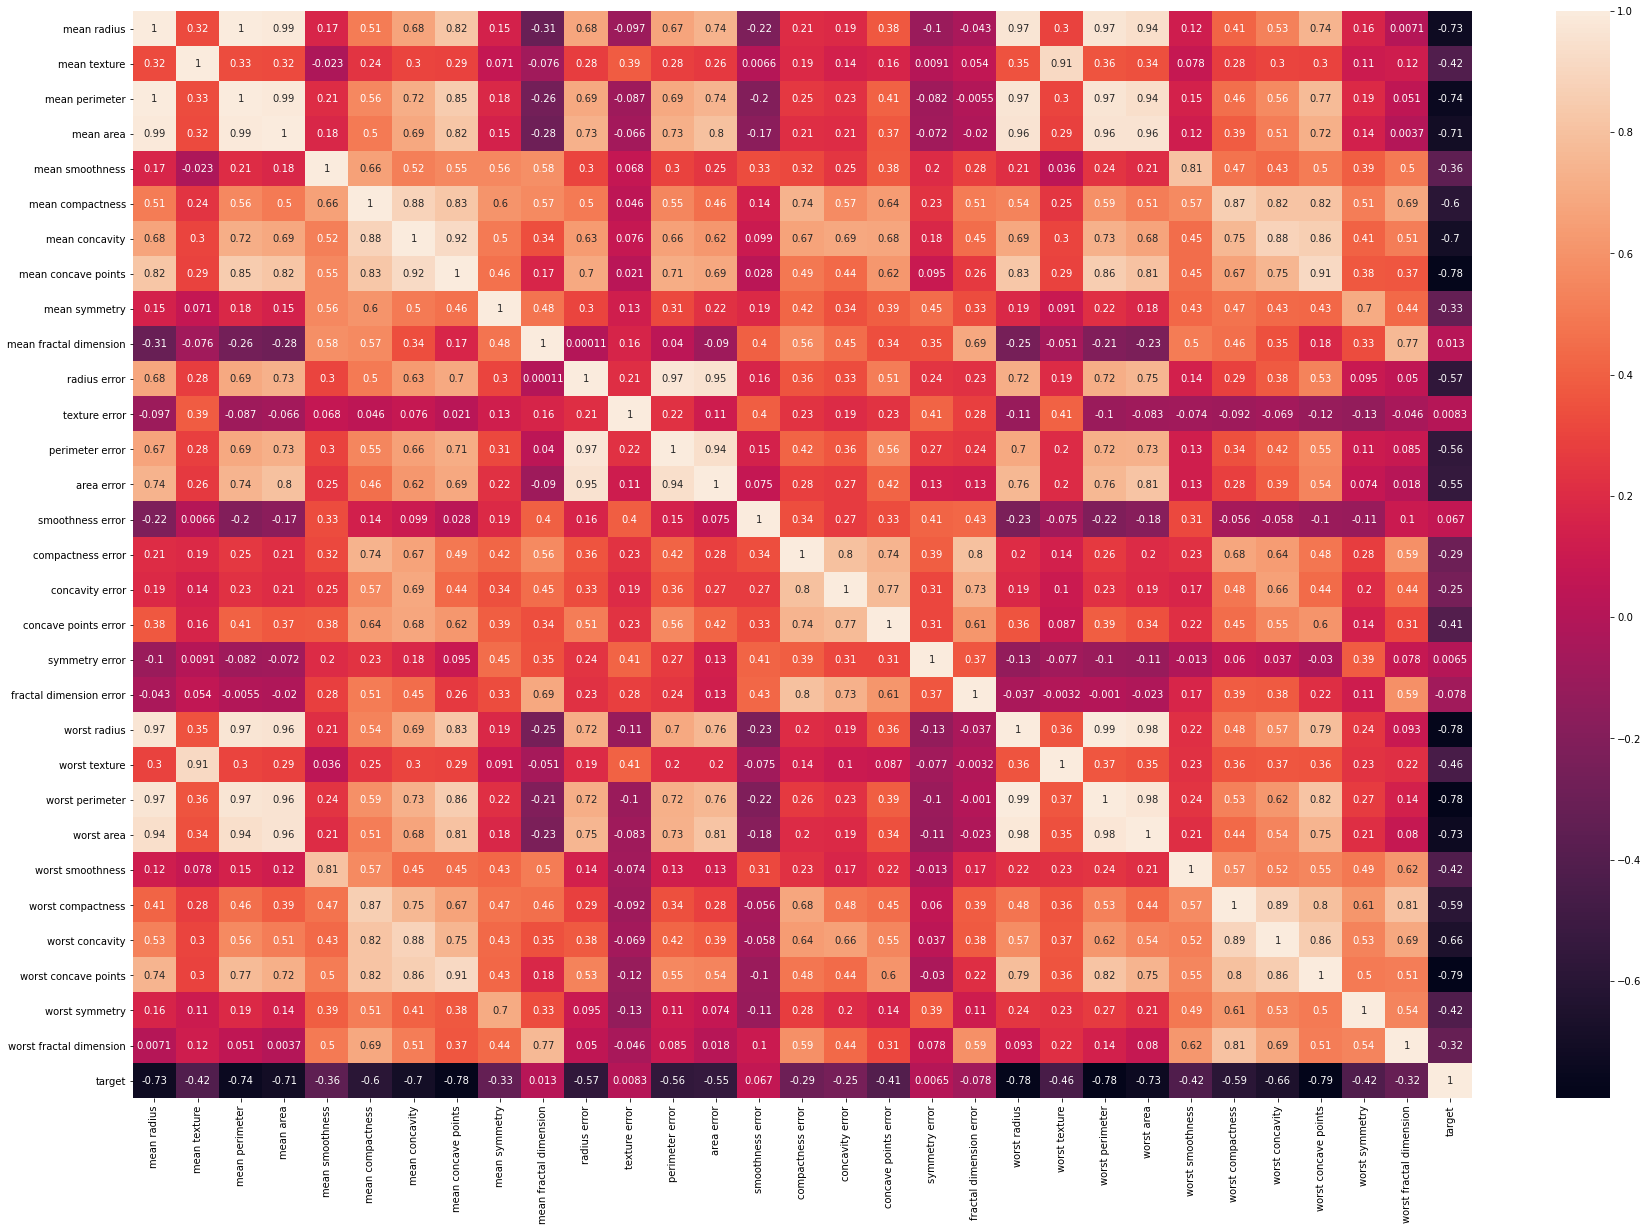

In [18]:
fig_dims=(30,20)
fig,ax=plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(),ax=ax,annot=True)

We observe a lot of very correlated features. Mean perimeter and mean area are just one example. <br>
We will have to select some features to overcome this problem. <br>
We also observe that many features seem to be very correlated with our target, therefore having an important weight in our future models. <br>
Let's observe it on a bar plot.

### 2. Feature importance

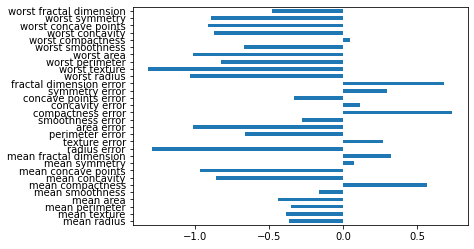

In [19]:
lr = LogisticRegression()
lr.fit(all_X, all_y)
coefficients = lr.coef_
feature_importance = pd.Series(coefficients[0],index = features)
feature_importance.plot.barh()

We observe a large number of features that weigh in the model. <br>
We will select our features thanks to RFECV (Recursive Feature Elimination).

### 3. RFECV

In [20]:
# Selection via RFECV on a logistic regression model
lr = LogisticRegression()
selector = RFECV(lr, cv=10)
selector.fit(all_X,all_y)

RFECV(cv=10, estimator=LogisticRegression())

In [21]:
# We pull the features out
optimized_columns = all_X.columns[selector.support_]
print(len(optimized_columns))

27


In [22]:
model_training(clf,optimized_columns)

{'recall': 0.9691269841269842,
 'precision': 0.9752087425771636,
 'f1': 0.9718952674262453}

We now have 27 features instead of 30. <br>
Let's resume with these new features.

In [23]:
# Evaluation and storage of our models scores
scores_rf_rfecv = model_training(rf_model,optimized_columns)
scores_boosting_rfecv = model_training(boosting_model, optimized_columns)
scores_svc_rfecv = model_training(svc_model, optimized_columns)
scores_knn_rfecv = model_training(knn_model, optimized_columns)
scores_xgb_rfecv = model_training(xgb_model, optimized_columns)

In [24]:
# Creation of a table for our different metrics
comparison_rfecv = pd.DataFrame({'Model': ['Random Forest', 'Gradient Boosting', 'Support Vector Machine','KNN','XGBoost'], 
                           'Recall': [scores_rf_rfecv['recall'],scores_boosting_rfecv['recall'],scores_svc_rfecv['recall'],scores_knn_rfecv['recall'],scores_xgb_rfecv['recall']], 
                           'Precision': [scores_rf_rfecv['precision'],scores_boosting_rfecv['precision'],scores_svc_rfecv['precision'],scores_knn_rfecv['precision'],scores_xgb_rfecv['precision']], 
                           'F1': [scores_rf_rfecv['f1'],scores_boosting_rfecv['f1'],scores_svc_rfecv['f1'],scores_knn_rfecv['f1'],scores_xgb_rfecv['f1']]
                          },columns=['Model','Recall','Precision','F1'])

In [25]:
# Descending sort on F1
comparison_rfecv.sort_values(by='F1', ascending=False)

,Model,Recall,Precision,F1
3,KNN,0.991587,0.958185,0.974215
0,Random Forest,0.980317,0.967982,0.970918
1,Gradient Boosting,0.974683,0.964578,0.968057
4,XGBoost,0.955159,0.950933,0.952600
2,Support Vector Machine,0.969048,0.788175,0.868839


<hr style="border:2px solid gray"> </hr>

<p style="font-family: Arial; font-size:2em;color:blue;"> IV. Hyperparameter optimization </p>

From now on, we will only focus on the F1 score to evaluate our models.

In [26]:
# Evaluation of our models according to F1 score with optimization of hyperparameters by GridSearch
def model_training_hyper(model,features, hyperparameters):
        grid = GridSearchCV(model, param_grid=hyperparameters,scoring='f1',cv=10)
        grid.fit(all_X[features], all_y)
        score = grid.best_score_
        params = grid.best_params_
        
        return score, params

In [27]:
## Creation of hyperparameter optimization dictionaries

# Random Forest
hyperparameters_rf = {"criterion": ["entropy", "gini"],
"max_depth": [5,10],
"max_features": ["log2","sqrt"],
"min_samples_leaf":[1,5],
"min_samples_split":[3,5],
"n_estimators":[6,9]}

# Gradient Boosting Classifer
hyperparameters_boosting = {
    'max_depth':range(5,16,2), 
    'min_samples_split':range(200,1001,200)}

# SVC
hyperparameters_svc = {
    'C': [0.01, 0.1, 0.5, 1, 10, 100], 
    'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
    'kernel': ['rbf', 'poly', 'linear']}

# KNN
hyperparameters_knn = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

# XGBoost
hyperparameters_xgb = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'gamma':[i/10.0 for i in range(0,5)]
}

In [28]:
# GridSearch for each of our models
rf_f1, rf_params = model_training_hyper(rf_model, features, hyperparameters_rf)
svc_f1, svc_params = model_training_hyper(svc_model, features, hyperparameters_svc)
knn_f1, knn_params = model_training_hyper(knn_model, features, hyperparameters_knn)
xgb_f1, xgb_params = model_training_hyper(xgb_model, features, hyperparameters_xgb)
boosting_f1, boosting_params = model_training_hyper(boosting_model, features, hyperparameters_boosting)

In [29]:
# Creation of a table for our different models
comparison_hyper = pd.DataFrame({'Model': ['Random Forest', 'Gradient Boosting', 'Support Vector Machine','KNN','XGBoost'], 
                                 'F1': [rf_f1,boosting_f1,svc_f1,knn_f1,xgb_f1]
                          },columns=['Model','F1'])

# Descending sort on F1
comparison_hyper.sort_values(by='F1', ascending=False)

,Model,F1
2,Support Vector Machine,0.983517
3,KNN,0.977916
1,Gradient Boosting,0.973660
0,Random Forest,0.972511
4,XGBoost,0.969429


We will therefore work with a SVM.

<p style="font-family: Arial; font-size:2em;color:blue;"> V. Evaluation on a test set </p>

In [30]:
# Training and test sets split
X_train, X_test, y_train, y_test = train_test_split(all_X, all_y, test_size=0.33, random_state=42)

# Creation of our dictionary for GridSearch
hyperparameters = {
    'C': [0.01, 0.1, 0.5, 1, 10, 100], 
    'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
    'kernel': ['rbf', 'poly', 'linear']}

# Model instantiation
model = SVC(kernel='linear')

# Selection of the best features
selector = RFECV(model, cv=10)
selector.fit(X_train,y_train)
optimized_columns = X_train.columns[selector.support_]

# Hyperparameter optimization
grid = GridSearchCV(model, param_grid=hyperparameters,scoring='f1',cv=10)
grid.fit(X_train, y_train)
params = grid.best_params_

# Test set validation
opt_model = SVC(**params)
opt_model.fit(X_train[optimized_columns],y_train)
predictions = opt_model.predict(X_test[optimized_columns])
print("F1: {:.3f} \nParameters: {}".format(f1_score(y_test,predictions),params))


F1: 0.988 
Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [31]:
print("F1: {:.3f} \nParameters: {}".format(f1_score(y_test,predictions),params))

F1: 0.988 
Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


## Conclusion

We can see that our Support Vector Machine algorithm seems to be a good fit for our problem with a C of 10, gamma of 0.01 and an rbf kernel. <br>
We obtain an F1 score of **98.8%**.

We could improve the model by spending more time on optimizing hyperparameters.
We could also create better features. We could use a Principal Component Analysis.
We could test a neural network with an MLPClassifier.